# Average AWAKEN HH flow fields

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                  '/ccs/proj/cfd162/lcheung/amrwind-frontend/',
                ]
import sys, os, shutil, io
import numpy as np
for x in amrwindfedirs: sys.path.insert(1, x)

from functools import partial
import matplotlib.pyplot as plt
import pandas as pd

# Make all plots inline 
#%matplotlib inline

import postproengine as ppeng

import imageio
import glob
import cv2

/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# Load ruamel or pyyaml as needed
try:
    import ruamel.yaml
    yaml = ruamel.yaml.YAML(typ='unsafe', pure=True)
    useruamel=True
    loaderkwargs = {'Loader':yaml.RoundTripLoader}
    dumperkwargs = {'Dumper':yaml.RoundTripDumper, 'indent':4, 'default_flow_style':False}
    Loader=yaml.load
except:
    import yaml as yaml
    useruamel=False
    loaderkwargs = {}
    dumperkwargs = {'default_flow_style':False }
    Loader=yaml.safe_load
    
def stringReplaceDict(s, dreplace):
    outstr = str(s)
    for k, g in dreplace.items():
        outstr=outstr.replace(k, str(g))
    return outstr
    
def formatTfig(fig,ax):
    ax.set_xlim([300, 301])
    return

def isInsideBox(x,y,box):
    if (box[0][0] <= x) and (x <= box[0][1]) and (box[1][0] <= y) and (y <= box[1][1]):
        return True
    else:
        return False
    

def getturbcolor(x,y):
    frontbox = [[0, 700000], [4.02E6, 4.0265E6]]
    backbox = [[0, 700000], [4.03E6, 4.035E6]]       #backbox = [[0, 700000], [4.029E6, 4.035E6]]
    backWbox = [[0, 638000], [4.03E6, 4.035E6]]      #637700
    backEbox = [[638000, 700000], [4.03E6, 4.035E6]] #637700
    midbox = [[632500, 638000], [4.027E6, 4.029E6]]  #midbox = [[632500, 637800], [4.027E6, 4.029E6]]
    if isInsideBox(x,y, frontbox):
        return 'r'
    if isInsideBox(x,y, backEbox):
        return 'b'
    if isInsideBox(x,y, backWbox):
        return 'c'        
    if isInsideBox(x,y, midbox):
        return 'pink'
    return 'k'

def addturbines(fig, ax):
    rundir = '/tscratch/lcheung/AWAKEN/Benchmark1/Phase3/FarmRuns/BM3_FarmRunProd1_runA.perftest/'
    outputcsv = rundir + '/turbines_farmrun.csv'
    # Process the csv file
    df = pd.read_csv(outputcsv)
    # Fix the turbine types of the turbines
    for index, row in df.iterrows():
        turbcolor = getturbcolor(row[' x'], row[' y'])
        turbcolor = 'k'
        ax.plot(row[' x'], row[' y'], 's', mfc=turbcolor, mec='k', mew=0.25, markersize=2)
    return

#ppeng.formatTfig = formatTfig
ppeng.addturbines = addturbines

In [3]:
replacedict={'RUNDIRA':'/tscratch/lcheung/AWAKEN/Benchmark1/Phase3/FarmRuns/BM3_FarmRunProd1_runA/',
             'RUNDIR_A1':'/tscratch/lcheung/AWAKEN/Benchmark1/Phase3/FarmRuns/BM3_FarmRunProd1_runA1/',
             'RUNDIR_A2':'/tscratch/lcheung/AWAKEN/Benchmark1/Phase3/FarmRuns/BM3_FarmRunProd1_runA2/',
             'RUNDIR_A3':'/tscratch/lcheung/AWAKEN/Benchmark1/Phase3/FarmRuns/BM3_FarmRunProd1_runA3/',
             #'RUNDIRB':'/tscratch/lcheung/AWAKEN/Benchmark1/Phase3/FarmRuns/BM3_FarmRunProd1_runB/',
             #'RUNDIRC':'/tscratch/lcheung/AWAKEN/Benchmark1/Phase3/FarmRuns/BM3_FarmRunProd1_runC/',
             #'NCPREFIX':'hubheight',
             'NCPREFIX':'KP_z090hh',
            }

In [4]:
yamlstring="""
globalattributes:
  verbose: False
  executeorder:
  - avgworkflow

avgworkflow:
  avgplanes:
  - name: HHplot1
    ncfile:
    - RUNDIRA/post_processing/NCPREFIX_14400.nc
    - RUNDIR_A1/post_processing/NCPREFIX_37800.nc
    - RUNDIR_A2/post_processing/NCPREFIX_54000.nc
    - RUNDIR_A3/post_processing/NCPREFIX_72900.nc
    #- RUNDIRB/post_processing/NCPREFIX_21600.nc
    #- RUNDIRC/post_processing/NCPREFIX_25200.nc
    tavg: [8400, 9000]
    varnames: [ 'velocityx', 'velocityy', 'velocityz'] 
    # --- optional stuff here ---
    contourplot:
        title: 'AVG $U_h$ t=8400-9000'
        plotfunc: "lambda db: np.sqrt(db['velocityx_avg']**2 + db['velocityy_avg']**2)"
        clevels: 'np.linspace(0, 12, 121)'
        postplotfunc: postproengine.addturbines
        #xscalefunc: 'lambda x: (x-126*4)/126.0'
        #yscalefunc: 'lambda y: (y-126*2)/126.0'
        xaxis: x
        yaxis: y
        xlabel: 'UTM X [m]'
        ylabel: 'UTM Y [m]'
        cbar_nticks: 13
        fontsize: 10
        figsize: [8,6]
        dpi: 125

  - name: HHplot2
    ncfile:
    - RUNDIRA/post_processing/NCPREFIX_14400.nc
    - RUNDIR_A1/post_processing/NCPREFIX_37800.nc
    - RUNDIR_A2/post_processing/NCPREFIX_54000.nc
    - RUNDIR_A3/post_processing/NCPREFIX_72900.nc
    #- RUNDIRB/post_processing/NCPREFIX_21600.nc
    #- RUNDIRC/post_processing/NCPREFIX_25200.nc
    tavg: [10200, 10800]
    varnames: [ 'velocityx', 'velocityy', 'velocityz'] 
    # --- optional stuff here ---
    contourplot:
        title: 'AVG $U_h$ t=10200-10800'
        plotfunc: "lambda db: np.sqrt(db['velocityx_avg']**2 + db['velocityy_avg']**2)"
        clevels: 'np.linspace(0, 12, 121)'
        postplotfunc: postproengine.addturbines
        #xscalefunc: 'lambda x: (x-126*4)/126.0'
        #yscalefunc: 'lambda y: (y-126*2)/126.0'
        xaxis: x
        yaxis: y
        xlabel: 'UTM X [m]'
        ylabel: 'UTM Y [m]'
        cbar_nticks: 13
        fontsize: 10
        figsize: [8,6]
        dpi: 125

  - name: HHplot3
    ncfile:
    - RUNDIRA/post_processing/NCPREFIX_14400.nc
    - RUNDIR_A1/post_processing/NCPREFIX_37800.nc
    - RUNDIR_A2/post_processing/NCPREFIX_54000.nc
    - RUNDIR_A3/post_processing/NCPREFIX_72900.nc
    #- RUNDIRB/post_processing/NCPREFIX_21600.nc
    #- RUNDIRC/post_processing/NCPREFIX_25200.nc
    tavg: [11400, 12000]
    varnames: [ 'velocityx', 'velocityy', 'velocityz'] 
    # --- optional stuff here ---
    contourplot:
        title: 'AVG $U_h$ t=11400-12000'
        plotfunc: "lambda db: np.sqrt(db['velocityx_avg']**2 + db['velocityy_avg']**2)"
        clevels: 'np.linspace(0, 12, 121)'
        postplotfunc: postproengine.addturbines
        #xscalefunc: 'lambda x: (x-126*4)/126.0'
        #yscalefunc: 'lambda y: (y-126*2)/126.0'
        xaxis: x
        yaxis: y
        xlabel: 'UTM X [m]'
        ylabel: 'UTM Y [m]'
        cbar_nticks: 13
        fontsize: 10
        figsize: [8,6]
        dpi: 125

  - name: HHplot4
    ncfile:
    - RUNDIRA/post_processing/NCPREFIX_14400.nc
    - RUNDIR_A1/post_processing/NCPREFIX_37800.nc
    - RUNDIR_A2/post_processing/NCPREFIX_54000.nc
    - RUNDIR_A3/post_processing/NCPREFIX_72900.nc
    #- RUNDIRB/post_processing/NCPREFIX_21600.nc
    #- RUNDIRC/post_processing/NCPREFIX_25200.nc
    tavg: [13400, 14000]
    varnames: [ 'velocityx', 'velocityy', 'velocityz'] 
    # --- optional stuff here ---
    contourplot:
        title: 'AVG $U_h$ t=13400-14000'
        plotfunc: "lambda db: np.sqrt(db['velocityx_avg']**2 + db['velocityy_avg']**2)"
        clevels: 'np.linspace(0, 12, 121)'
        postplotfunc: postproengine.addturbines
        #xscalefunc: 'lambda x: (x-126*4)/126.0'
        #yscalefunc: 'lambda y: (y-126*2)/126.0'
        xaxis: x
        yaxis: y
        xlabel: 'UTM X [m]'
        ylabel: 'UTM Y [m]'
        cbar_nticks: 13
        fontsize: 10
        figsize: [8,6]
        dpi: 125

"""
f = io.StringIO(stringReplaceDict(yamlstring, replacedict))
yamldict = Loader(f, **loaderkwargs)

Initialized avgplanes
Running avgplanes
/tscratch/lcheung/AWAKEN/Benchmark1/Phase3/FarmRuns/BM3_FarmRunProd1_runA//post_processing/KP_z090hh_14400.nc 600
Getting data from ncfile:  /tscratch/lcheung/AWAKEN/Benchmark1/Phase3/FarmRuns/BM3_FarmRunProd1_runA//post_processing/KP_z090hh_14400.nc
[============================================================] 100.0% 
/tscratch/lcheung/AWAKEN/Benchmark1/Phase3/FarmRuns/BM3_FarmRunProd1_runA1//post_processing/KP_z090hh_37800.nc 0
Getting data from ncfile:  /tscratch/lcheung/AWAKEN/Benchmark1/Phase3/FarmRuns/BM3_FarmRunProd1_runA1//post_processing/KP_z090hh_37800.nc

/tscratch/lcheung/AWAKEN/Benchmark1/Phase3/FarmRuns/BM3_FarmRunProd1_runA2//post_processing/KP_z090hh_54000.nc 0
Getting data from ncfile:  /tscratch/lcheung/AWAKEN/Benchmark1/Phase3/FarmRuns/BM3_FarmRunProd1_runA2//post_processing/KP_z090hh_54000.nc

/tscratch/lcheung/AWAKEN/Benchmark1/Phase3/FarmRuns/BM3_FarmRunProd1_runA3//post_processing/KP_z090hh_72900.nc 0
Getting data from ncf

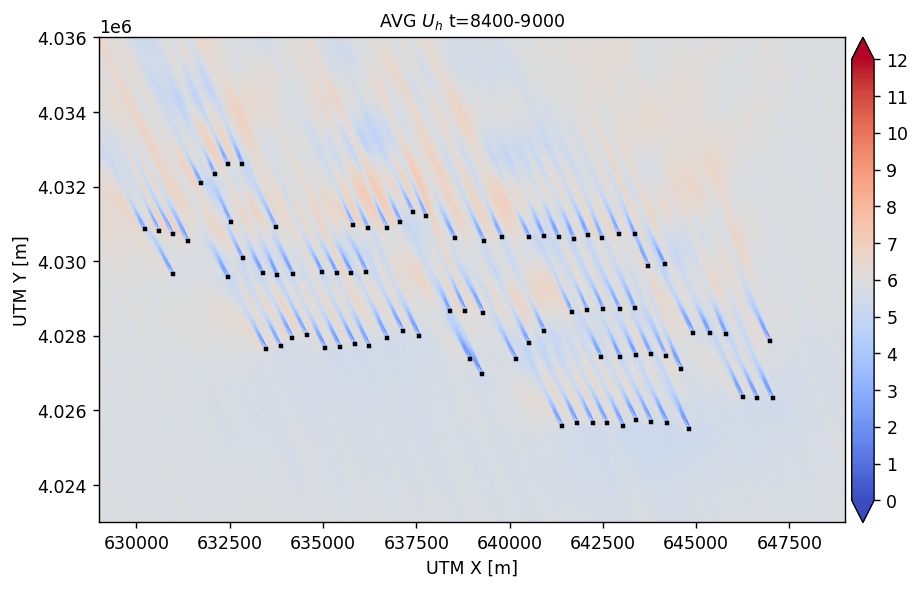

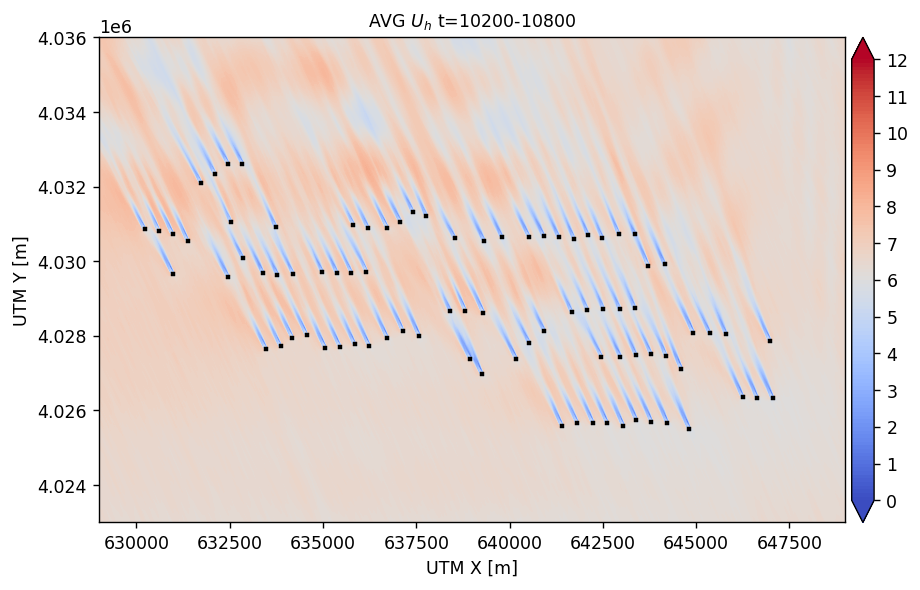

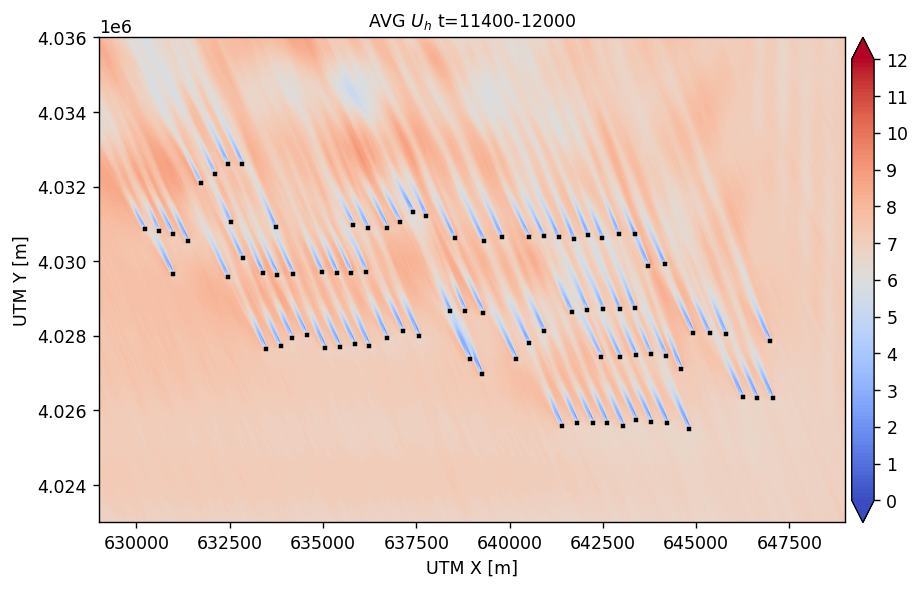

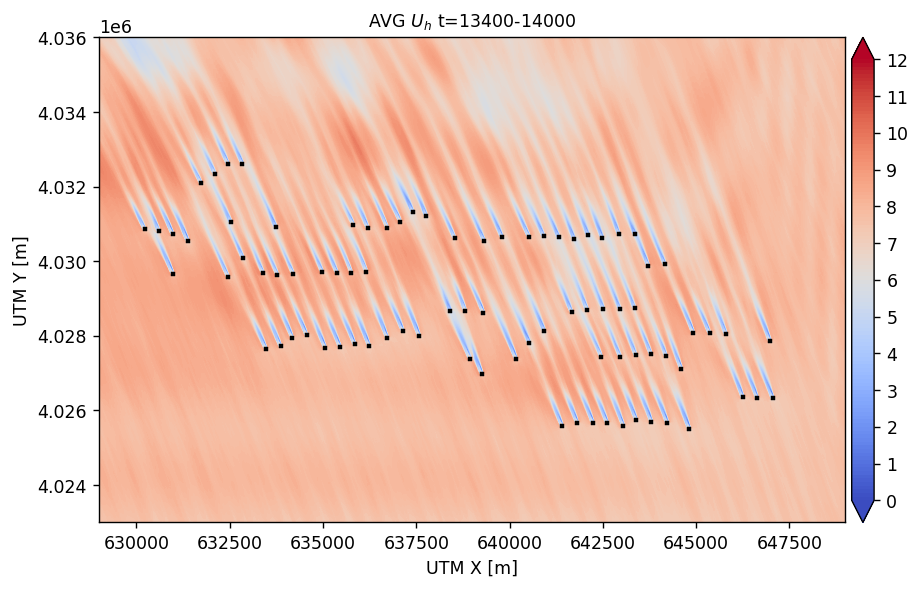

In [5]:
# Run the driver
ppeng.driver(yamldict, verbose=True)